In [49]:
import astroalign as aa
aa.__version__

'2.5.1'

In [50]:
import numpy as np
from astropy.io import fits
from aplpy import FITSFigure

In [51]:
fits.info('B.fit')

Filename: B.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      72   (1080, 1920, 3)   int16 (rescales to uint16)   


In [52]:
target = fits.getdata("A.fit", ext=0)[0].astype(np.uint16)
source = fits.getdata("B.fit", ext=0)[0].astype(np.uint16)

INFO: Auto-setting vmin to  7.364e+01 [aplpy.core]
INFO: Auto-setting vmax to  5.946e+04 [aplpy.core]


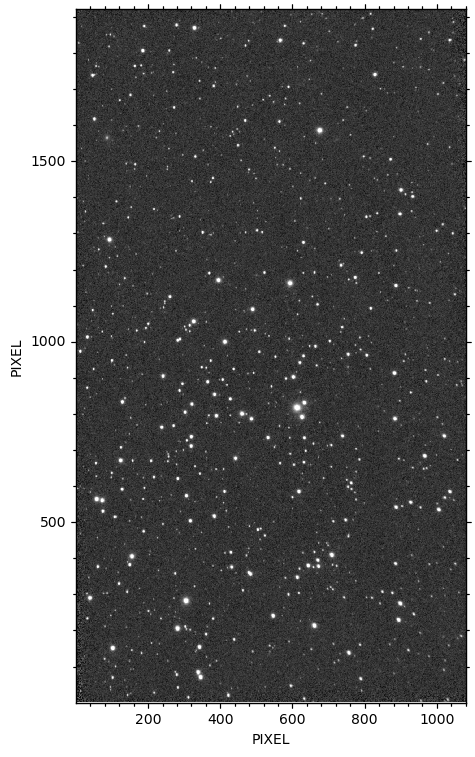

In [53]:
img = FITSFigure(source)
img.show_grayscale()

INFO: Auto-setting vmin to  1.379e+02 [aplpy.core]
INFO: Auto-setting vmax to  5.132e+04 [aplpy.core]


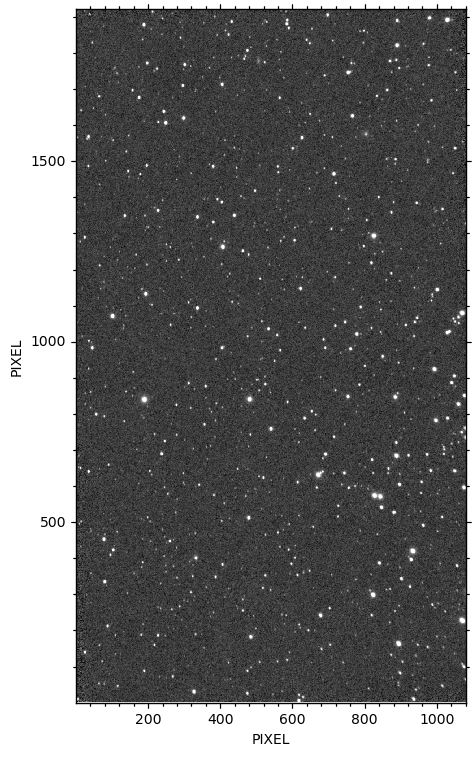

In [54]:
img = FITSFigure(target)
img.show_grayscale()

In [55]:
mask = np.ones_like(target, dtype="bool")
mask[:,800:] = False  # ROI
target_masked = np.ma.array(target, mask=mask)

mask = np.ones_like(source, dtype="bool")
mask[:,:400] = False  # ROI
source_masked = np.ma.array(source, mask=mask)

In [56]:
registered, footprint = aa.register(source_masked, target_masked)

INFO: Auto-setting vmin to  4.085e+03 [aplpy.core]
INFO: Auto-setting vmax to  3.139e+04 [aplpy.core]


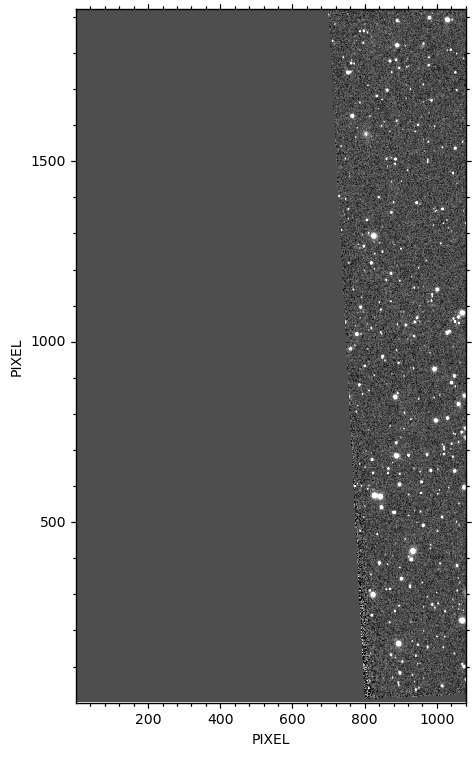

In [57]:
img = FITSFigure(registered)
img.show_grayscale()

# Make a mosaic

In [62]:
# Expand target and mask the expanded area:

target_expanded = np.zeros((1920, 2000))
target_expanded[:,:1080] = target

mask = np.ones_like(target_expanded, dtype="bool")
mask[:,800:1080] = False  # ROI
target_masked = np.ma.array(target_expanded, mask=mask)

INFO: Auto-setting vmin to -4.246e+03 [aplpy.core]
INFO: Auto-setting vmax to  4.714e+04 [aplpy.core]


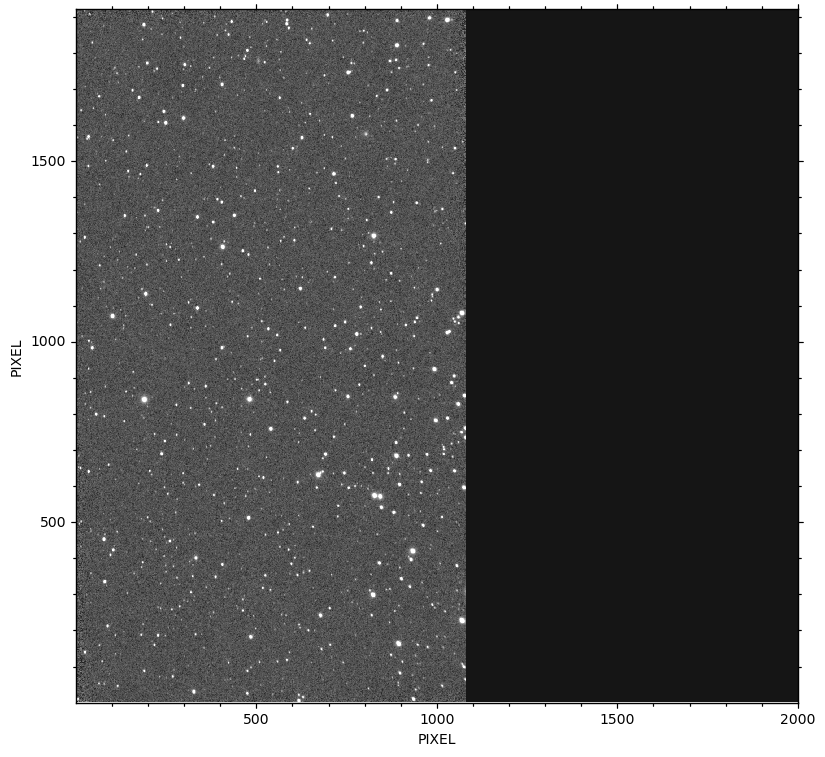

In [61]:
img = FITSFigure(target_expanded)
img.show_grayscale()

In [63]:
registered, footprint = aa.register(source_masked, target_expanded)

INFO: Auto-setting vmin to  2.174e+03 [aplpy.core]
INFO: Auto-setting vmax to  4.807e+04 [aplpy.core]


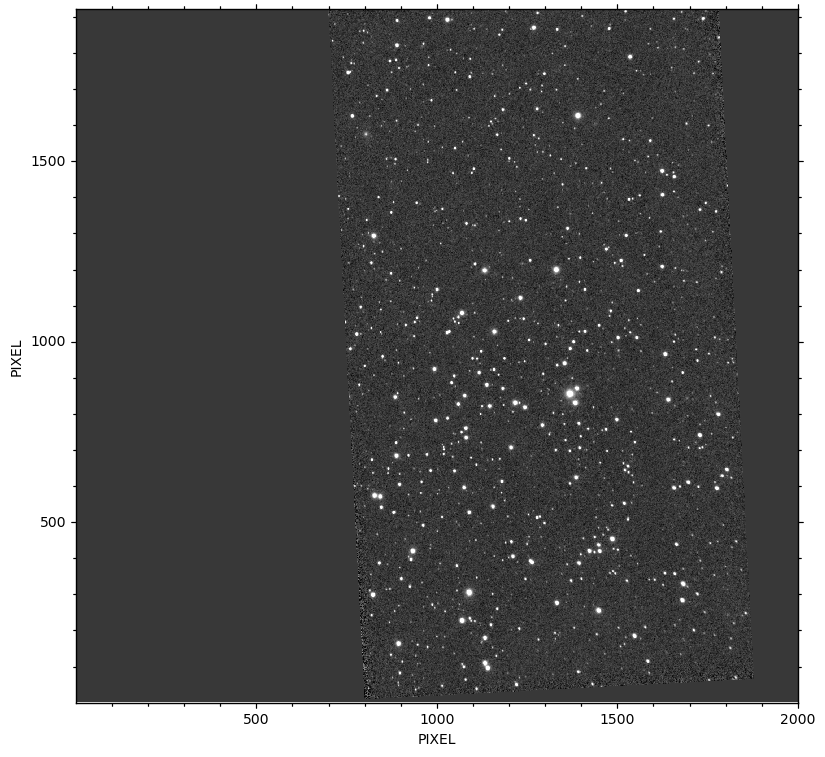

In [64]:
img = FITSFigure(registered)
img.show_grayscale()

INFO: Auto-setting vmin to  7.611e+02 [aplpy.core]
INFO: Auto-setting vmax to  7.025e+04 [aplpy.core]


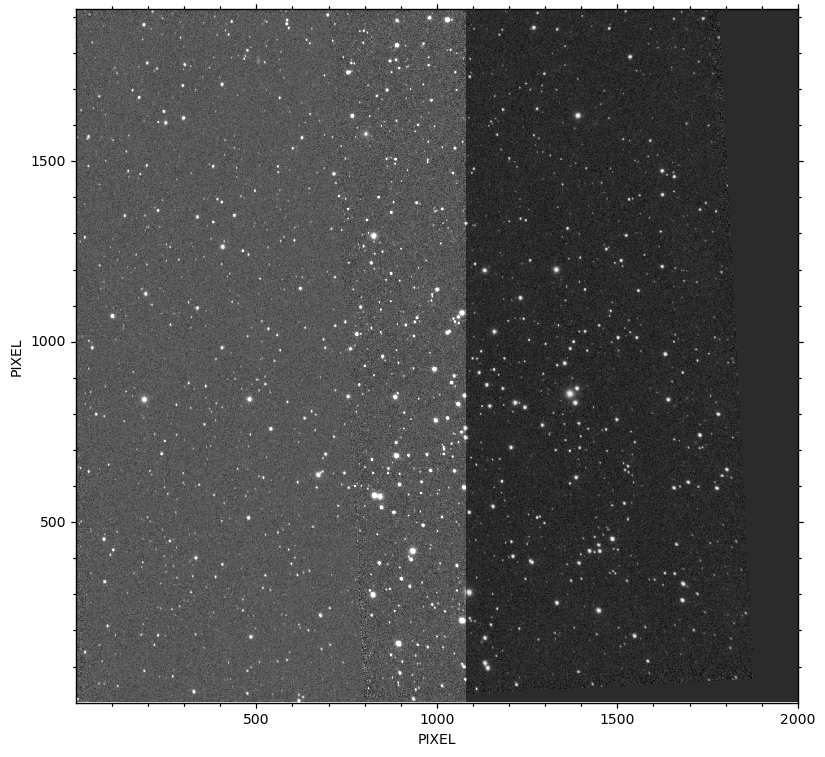

In [66]:
# Combine registered and target_expanded
img = FITSFigure(registered + target_expanded)
img.show_grayscale()